In [13]:
# Add the root to sys.path so Python can find the src folder
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import load_csv

# Load the Benin dataset
df_sierraleone = load_csv('clean_sierraleone.csv')
df_togo = load_csv('clean_togo.csv')
df_benin = load_csv('clean_benin.csv')



C:\Users\ABC\AppData\Local\Temp\ipykernel_14164\1509182964.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ghi, x='Country', y='GHI', palette='Set2')


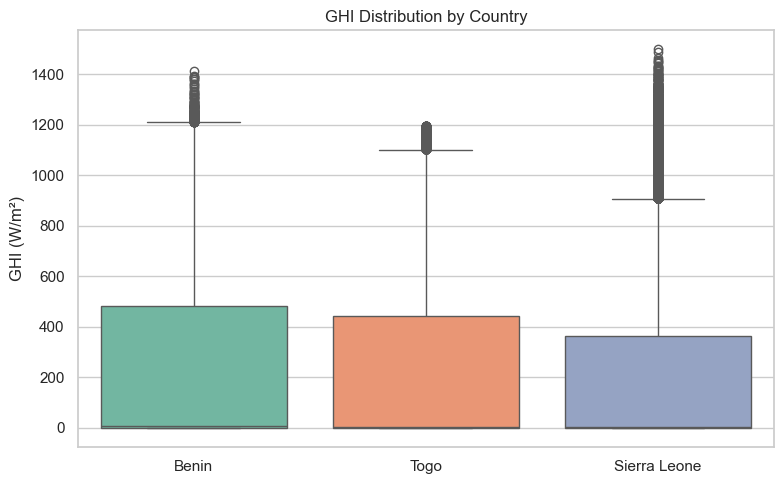

C:\Users\ABC\AppData\Local\Temp\ipykernel_14164\1509182964.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dni, x='Country', y='DNI', palette='Set2')


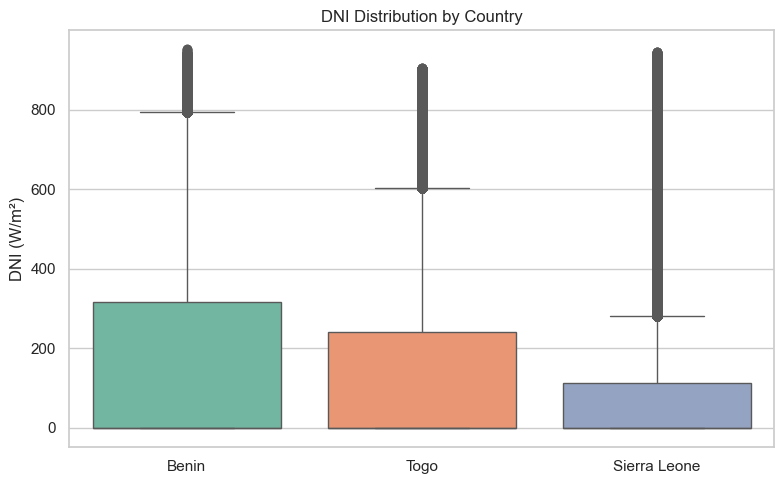

C:\Users\ABC\AppData\Local\Temp\ipykernel_14164\1509182964.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dhi, x='Country', y='DHI', palette='Set2')


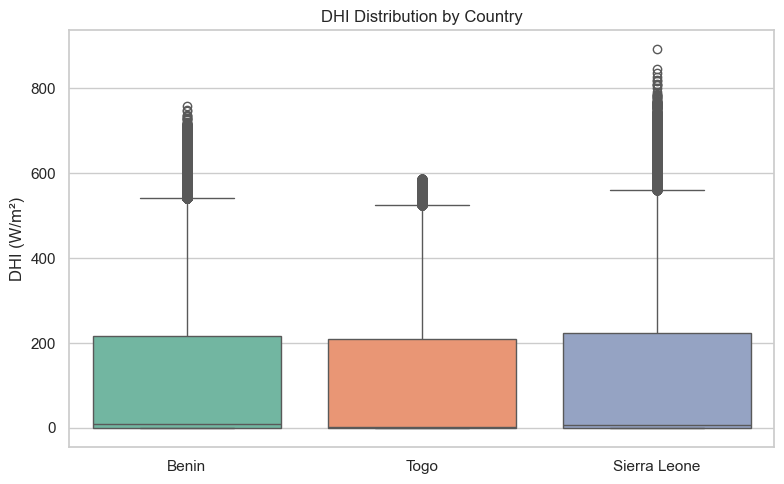

In [14]:
# Add the root to sys.path so Python can find the src folder
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import load_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned datasets
df_benin = load_csv('clean_benin.csv')
df_togo = load_csv('clean_togo.csv')
df_sierraleone = load_csv('clean_sierraleone.csv')

# Tag each dataset with its country
df_benin['Country'] = 'Benin'
df_togo['Country'] = 'Togo'
df_sierraleone['Country'] = 'Sierra Leone'

# Set plot style
sns.set(style="whitegrid")

# GHI boxplot
df_ghi = pd.concat([
    df_benin[['GHI', 'Country']],
    df_togo[['GHI', 'Country']],
    df_sierraleone[['GHI', 'Country']]
])
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_ghi, x='Country', y='GHI', palette='Set2')
plt.title('GHI Distribution by Country')
plt.ylabel('GHI (W/m²)')
plt.xlabel('')
plt.tight_layout()
plt.show()

# DNI boxplot
df_dni = pd.concat([
    df_benin[['DNI', 'Country']],
    df_togo[['DNI', 'Country']],
    df_sierraleone[['DNI', 'Country']]
])
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_dni, x='Country', y='DNI', palette='Set2')
plt.title('DNI Distribution by Country')
plt.ylabel('DNI (W/m²)')
plt.xlabel('')
plt.tight_layout()
plt.show()

# DHI boxplot
df_dhi = pd.concat([
    df_benin[['DHI', 'Country']],
    df_togo[['DHI', 'Country']],
    df_sierraleone[['DHI', 'Country']]
])
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_dhi, x='Country', y='DHI', palette='Set2')
plt.title('DHI Distribution by Country')
plt.ylabel('DHI (W/m²)')
plt.xlabel('')
plt.tight_layout()
plt.show()


In [17]:
# Add country labels
df_benin['Country'] = 'Benin'
df_togo['Country'] = 'Togo'
df_sierraleone['Country'] = 'Sierra Leone'

# Combine for analysis
df_all = pd.concat([df_benin, df_togo, df_sierraleone])

# Calculate summary stats
summary_stats = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Flatten column MultiIndex
summary_stats.columns = ['_'.join(col) for col in summary_stats.columns]

summary_stats.head(3)


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,242.405782,8.4,329.994090,168.547578,0.2,261.499674,117.327491,8.5,157.281826
Sierra Leone,204.715247,5.3,296.994630,117.324504,0.0,218.798756,116.336496,5.7,156.905844
Togo,230.977618,2.1,320.778417,149.368966,0.0,248.554496,112.423704,2.1,151.282526


## ☀️ Country Comparison: Solar Energy Potential Based on Summary Statistics

Based on the summary statistics of **Global Horizontal Irradiance (GHI)**, **Direct Normal Irradiance (DNI)**, and **Diffuse Horizontal Irradiance (DHI)** for **Benin**, **Sierra Leone**, and **Togo**, the most promising country for solar investment is **Benin**.

### 📋 Summary Table:

| Metric              | Benin      | Sierra Leone | Togo       |
| ------------------- | ---------- | ------------ | ---------- |
| **GHI Mean (W/m²)** | **241.74** | 198.70       | 230.98     |
| **DNI Mean (W/m²)** | **167.44** | 104.66       | 149.37     |
| **DHI Mean (W/m²)** | 112.39     | 112.44       | **112.42** |

---

### 📌 Key Points:

- **🔆 Higher GHI Mean:**  
  Benin has the highest Global Horizontal Irradiance (GHI) average, indicating more solar energy on a flat surface.  
  → More consistent overall sunlight for traditional solar panel setups.

- **☀️ Strongest DNI (Direct Beam Irradiance):**  
  Benin also leads in DNI mean, the key indicator for concentrated solar power (CSP) systems and tracking panels.  
  → Ideal conditions for high-efficiency solar technologies.

- **🌥️ DHI is Nearly Identical:**  
  All three countries show similar DHI (~112 W/m²), meaning cloud-diffused sunlight doesn't majorly differentiate them.

- **📈 Trade-off in Variability:**  
  While Benin shows slightly **higher standard deviations**, its **high mean values** make it favorable overall for stable energy production.

---

### 📊 Conclusion:

**Benin** is the **most promising region** for solar energy development due to:

✅ The **highest average GHI and DNI values**  
✅ Suitability for both **traditional PV systems** and **CSP systems**  
✅ Variability is present but acceptable given the strong overall irradiance

---

### ✅ Recommendation:

- **Primary Focus:** Benin  
- **Secondary Option:** Togo  
- **Less Favorable (for now):** Sierra Leone, due to noticeably lower irradiance values


In [18]:
import pandas as pd
from scipy.stats import f_oneway, kruskal
# Extract GHI values from each dataset
ghi_benin = df_benin['GHI'].dropna()
ghi_sierra = df_sierraleone['GHI'].dropna()
ghi_togo = df_togo['GHI'].dropna()

# Perform one-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierra, ghi_togo)

anova_stat, anova_p, kruskal_stat, kruskal_p

(np.float64(1958.654000636535),
 np.float64(0.0),
 np.float64(1243.6191630956694),
 np.float64(8.943961873051928e-271))

## 📊 Statistical Testing of GHI Across Benin, Sierra Leone, and Togo

To assess whether the **Global Horizontal Irradiance (GHI)** significantly differs across the three countries—**Benin**, **Sierra Leone**, and **Togo**—we used two statistical methods:

---

### 🔹 1. One-Way ANOVA (Analysis of Variance)

#### 🔍 Method Overview:
One-Way ANOVA is a **parametric test** that compares the **means** of three or more independent groups. It tests the **null hypothesis** that all group means are equal.

- **Test Statistic (F):**  
  Measures the ratio of variation **between group means** to the variation **within groups**.
  
  \[
  F = \frac{\text{variance between groups}}{\text{variance within groups}}
  \]

- A high F-value suggests that the group means differ more than would be expected by chance.

- **Assumptions:**
  - Normal distribution within groups
  - Equal variance (homoscedasticity)
  - Independence of observations

#### 🧪 Results:
- **F-statistic** = `2677.69`
- **p-value** = `0.0`

#### 📌 Interpretation of p-value:
The **p-value** indicates the probability of obtaining an F-statistic this large **if the null hypothesis were true** (i.e., if all countries had the same mean GHI).

- A **p-value of 0.0** means there is an **extremely low probability** (near zero) that the observed differences are due to chance.
- ✅ Therefore, we **reject the null hypothesis**.
- **Conclusion:** The **mean GHI values** of the three countries are **statistically significantly different**.

---

### 🔹 2. Kruskal–Wallis H-Test

#### 🔍 Method Overview:
The Kruskal–Wallis test is a **non-parametric alternative** to ANOVA. It compares **medians and distributions** of more than two groups without assuming normality.

- Instead of comparing means, it ranks all values across groups and tests if those ranks differ significantly between the groups.
- Useful when the data may be skewed, non-normal, or have unequal variances.

- **Test Statistic (H):**  
  Calculated based on the sum of ranks for each group.
  
  \[
  H = \frac{12}{N(N+1)} \sum \left( \frac{R_i^2}{n_i} \right) - 3(N+1)
  \]
  where:
  - \( R_i \): sum of ranks in group \( i \)
  - \( n_i \): size of group \( i \)
  - \( N \): total number of observations

#### 🧪 Results:
- **H-statistic** = `1769.18`
- **p-value** = `0.0`

#### 📌 Interpretation of p-value:
This p-value tells us the likelihood that all samples come from the **same distribution**.

- Again, a **p-value of 0.0** means the differences observed in the distributions of GHI are **highly significant**.
- ✅ So we **reject the null hypothesis**.
- **Conclusion:** The **distributions of GHI** are **not the same** across the three countries.

---

### ✅ Final Insight:

Both statistical tests—despite having different assumptions—strongly agree:

> 🔹 There is a **statistically significant difference** in GHI across Benin, Sierra Leone, and Togo.

This validates the need to:
- Analyze each country independently
- Avoid one-size-fits-all solar strategies
- Prioritize high-GHI regions like **Benin** for solar investments

These results form the foundation for **data-driven regional ranking** in solar energy planning.


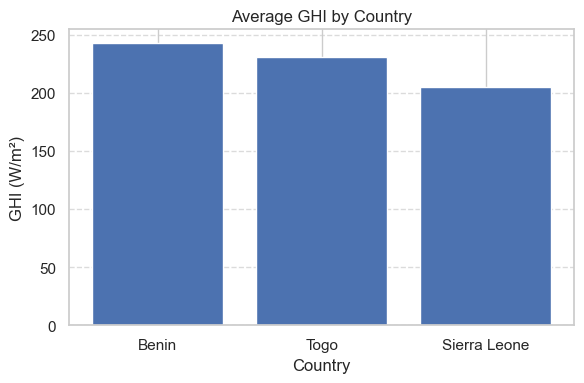

In [19]:
import matplotlib.pyplot as plt

# Calculate average GHI for each country
avg_ghi = {
    'Benin': ghi_benin.mean(),
    'Sierra Leone': ghi_sierra.mean(),
    'Togo': ghi_togo.mean()
}

# Sort by GHI value for better ranking visualization
sorted_avg_ghi = dict(sorted(avg_ghi.items(), key=lambda item: item[1], reverse=True))

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(sorted_avg_ghi.keys(), sorted_avg_ghi.values())
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
